### Дополнительное задание для работы с курсовым проектом:

__(Необязательно выполнять, но очень желательно)__

Скачать данные из соревнования. Считать их.

In [6]:
import pandas as pd
import numpy as np

RE=pd.read_csv('train.csv', sep=',')

In [7]:
RE.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [8]:
RE.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [9]:
RE.Healthcare_1.describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [10]:
import seaborn as sns

In [13]:
# ?sns.boxplot

<AxesSubplot:xlabel='LifeSquare'>

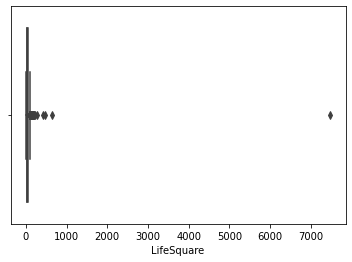

In [14]:
sns.boxplot(x=RE['LifeSquare'],whis=2)

In [15]:
RE[~RE.LifeSquare.isna()].sort_values(by='LifeSquare').LifeSquare.tail(20)

5631     127.477137
9767     136.215499
8055     136.697187
1614     138.004600
6209     138.910187
730      153.685835
6030     161.155275
3204     161.504222
5712     164.153360
6450     164.526757
8872     170.713651
5283     174.837082
1776     201.627361
7644     211.231125
1906     233.949309
357      263.542020
7010     410.639749
5183     461.463614
9229     638.163193
8000    7480.592129
Name: LifeSquare, dtype: float64

In [16]:
RE.LifeSquare.median()

32.781260192155735

In [17]:
RE.loc[RE.LifeSquare > 300, 'LifeSquare'] = RE.LifeSquare.median()

In [18]:
RE.loc[RE.LifeSquare.isna(), 'LifeSquare'] = RE.LifeSquare.median()

<AxesSubplot:xlabel='Healthcare_1'>

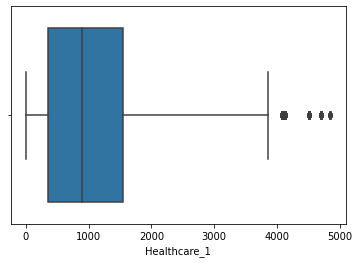

In [19]:
sns.boxplot(x=RE.Healthcare_1,whis=2)

Заполните пропущенные значения в датасете медианами или модами.

In [20]:
RE[~RE.Healthcare_1.isna()].sort_values(by='Healthcare_1').Healthcare_1.tail(20)

7827    4702.0
3301    4702.0
2648    4702.0
5839    4702.0
4699    4702.0
9637    4849.0
2844    4849.0
5028    4849.0
2852    4849.0
777     4849.0
6455    4849.0
2213    4849.0
7841    4849.0
1761    4849.0
9464    4849.0
5838    4849.0
4234    4849.0
9181    4849.0
5236    4849.0
7060    4849.0
Name: Healthcare_1, dtype: float64

In [21]:
RE.Healthcare_1.median()

900.0

In [22]:
RE.loc[RE.Healthcare_1.isna(), 'Healthcare_1'] = RE.Healthcare_1.median()

In [23]:
RE.LifeSquare.describe()

count    10000.000000
mean        35.380067
std         16.050730
min          0.370619
25%         25.527399
50%         32.781260
75%         41.415441
max        263.542020
Name: LifeSquare, dtype: float64

In [24]:
RE.Healthcare_1.describe()

count    10000.000000
mean      1026.358900
std        746.662828
min          0.000000
25%        830.000000
50%        900.000000
75%        990.000000
max       4849.000000
Name: Healthcare_1, dtype: float64

Переведите строковый признак в числовое представление.

In [26]:
RE.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [28]:
RE.Ecology_2.value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [29]:
RE.Ecology_3.value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [30]:
RE.Shops_2.value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Разбейте датасет из train.csv на обучающий и валидационный наборы данных.

In [ ]:
from sklearn.model_selection import train_test_split
# ?train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Обучите более сложную модель на ваш выбор. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Подберите оптимальные гиперпараметры для вашей модели. Пытайтесь улучшить её качество на двух наборах данных.